##ENFERMEDAD RENAL CRONICA

# Problema
Predecir la probabilidad de sufrir Enfermedad Renal Crónica – ERC a partir de factores de riesgo identificables y previsibles como son el peso, la hipertensión arterial y la diabetes.

# Variables dataset
ID_USUARIO: identificación anonimizada

EDAD: Edad del usuario

SEXO: Genero biológico M = Masculino; F= Femenino

DX_HTA: Diagnóstico confirmado de hipertension arterial; 0 = no y 1 = si

DX_DM: Diagnóstico confirmado de diabetes mellitus; 0 = no y 1 = si

DX_ERC: (Variable a predecir) Diagnóstico confirmado de enfermedad renal cronica; 0 = no y 1 = si

MUERTO: Confirma el estado de vida; 0 = no y 1 = si

IMC: indice de masa corporal  

$$ IMC = \frac{peso (kg)}{altura^2 (m^2)} $$



IMC_TIPO: descrpción del IMC

| Clasificación IMC      | Índice de masa corporal (kg/m²) |
|------------------------|---------------------------------|
| Peso inferior al normal | Menos de 18.5                   |
| Normal                 | 18.5 - 24.9                     |
| Sobrepeso              | 25.0 - 29.9                     |
| Obesidad I             | 30.0 - 34.9                     |
| Obesidad II            | 35.0 - 39.9                     |
| Obesidad III           | 40.0 o más                      |


## Cargar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar dataset


In [2]:
from google.colab import drive # conectar con el archivo en drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reemplaza 'ruta/a/tu/archivo.xlsx' con la ruta de tu archivo en Google Drive
excel_file_path = '/content/drive/MyDrive/TRABAJO FINAL APRENDIZAJE AUTO/ERC_2025_v2.xlsx'

try:
    df_excel = pd.read_excel(excel_file_path)
    print("Archivo cargado exitosamente:")
    display(df_excel.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {excel_file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo cargado exitosamente:


,ID_USUARIO,EDAD,SEXO,DX_HTA,DX_DM,IMC,IMC_TIPO,MUERTO,DX_ERC
0,1,53,M,0,1,31.397174,Obesidad I,0,0
1,2,46,M,1,0,32.421875,Obesidad I,0,0
2,3,52,M,1,0,29.068773,Sobrepeso,0,0
3,4,23,M,1,0,30.350330,Obesidad I,0,0
4,5,25,M,1,0,25.335002,Sobrepeso,0,0


In [4]:
df_excel.tail(5)                        # To display the botton 5 rows

,ID_USUARIO,EDAD,SEXO,DX_HTA,DX_DM,IMC,IMC_TIPO,MUERTO,DX_ERC
32866,32867,42,F,1,1,21.227888,Normal,0,1
32867,32868,50,F,1,1,28.720083,Sobrepeso,0,1
32868,32869,22,F,1,1,30.846277,Obesidad I,0,1
32869,32870,8,M,0,0,12.500000,Bajo peso,0,1
32870,32871,57,M,1,0,24.999125,Normal,0,1


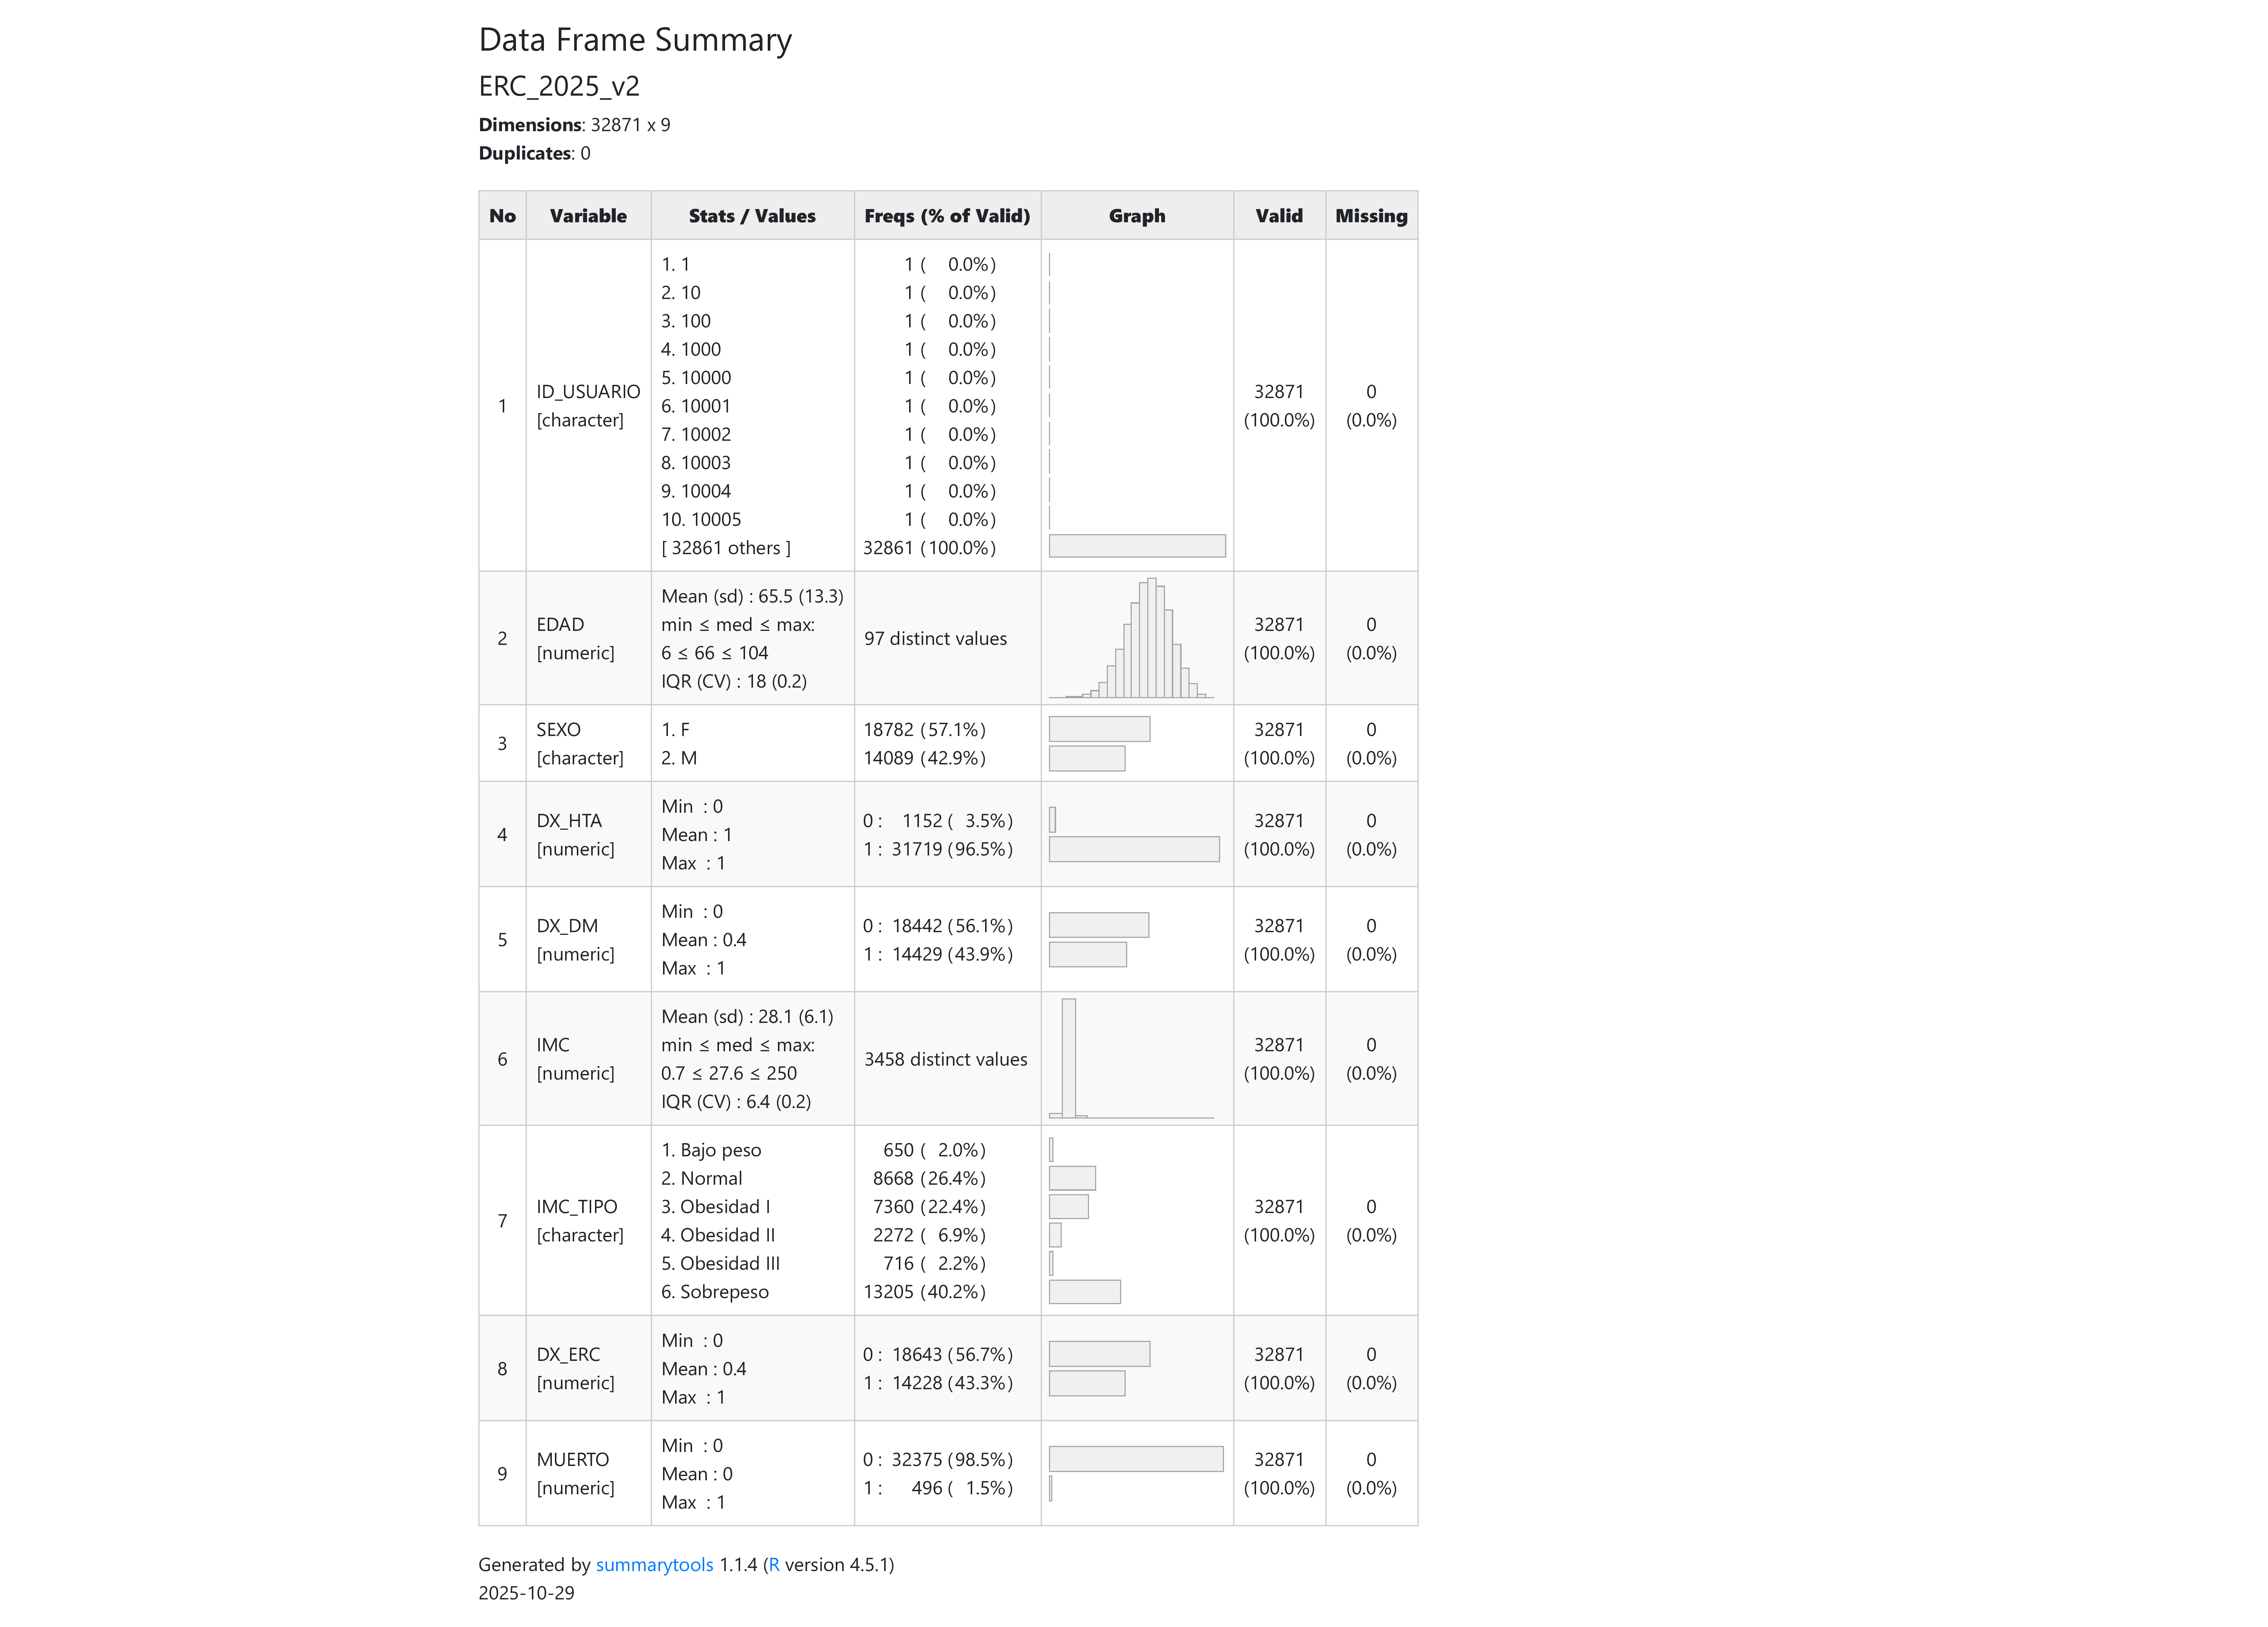

##Transformar datos

Aplicación one hot encoding a variable SEXO

In [5]:
# Check if 'SEXO' column still exists before processing
if 'SEXO' in df_excel.columns:
    # Ensure SEXO has 'M'/'F' values for meaningful one-hot encoding column names (SEXO_M, SEXO_F)
    # This handles cases where SEXO might be 1/2 from a previous replace operation (like cell 06oEmL9zpzyI)
    # or if it's already 'M'/'F' from the original load.
    df_excel['SEXO'] = df_excel['SEXO'].replace({1: 'M', 2: 'F', 'M': 'M', 'F': 'F'})

    # Apply one-hot encoding
    df_excel = pd.get_dummies(df_excel, columns=['SEXO'], prefix='SEXO')

    # Convert the new boolean columns to integer (0 and 1)
    # Check for existence of these new columns as get_dummies produces them
    if 'SEXO_F' in df_excel.columns:
        df_excel['SEXO_F'] = df_excel['SEXO_F'].astype(int)
    if 'SEXO_M' in df_excel.columns:
        df_excel['SEXO_M'] = df_excel['SEXO_M'].astype(int)
else:
    print("La columna 'SEXO' ya ha sido procesada o no existe. Mostrando el DataFrame actual:")

# Obtener todas las columnas excepto 'DX_ERC'
columns = [col for col in df_excel.columns if col != 'DX_ERC']

# Añadir 'DX_ERC' al final de la lista de columnas
columns.append('DX_ERC')

# Reindexar el DataFrame con el nuevo orden de columnas
df_excel = df_excel[columns]

print("DataFrame con 'DX_ERC' reubicada al final:")
display(df_excel.head())


DataFrame con 'DX_ERC' reubicada al final:


,ID_USUARIO,EDAD,DX_HTA,DX_DM,IMC,IMC_TIPO,MUERTO,SEXO_F,SEXO_M,DX_ERC
0,1,53,0,1,31.397174,Obesidad I,0,0,1,0
1,2,46,1,0,32.421875,Obesidad I,0,0,1,0
2,3,52,1,0,29.068773,Sobrepeso,0,0,1,0
3,4,23,1,0,30.350330,Obesidad I,0,0,1,0
4,5,25,1,0,25.335002,Sobrepeso,0,0,1,0


## Eliminar variables irrelevantes
Se eliminan ID_USUARIO, IMC_TIPO, MUERTO


In [6]:
df_excel = df_excel.drop(['ID_USUARIO', 'IMC_TIPO' , 'MUERTO' ], axis=1, errors='ignore')
display(df_excel.head())

,EDAD,DX_HTA,DX_DM,IMC,SEXO_F,SEXO_M,DX_ERC
0,53,0,1,31.397174,0,1,0
1,46,1,0,32.421875,0,1,0
2,52,1,0,29.068773,0,1,0
3,23,1,0,30.350330,0,1,0
4,25,1,0,25.335002,0,1,0


In [7]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32871 entries, 0 to 32870
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EDAD    32871 non-null  int64  
 1   DX_HTA  32871 non-null  int64  
 2   DX_DM   32871 non-null  int64  
 3   IMC     32871 non-null  float64
 4   SEXO_F  32871 non-null  int64  
 5   SEXO_M  32871 non-null  int64  
 6   DX_ERC  32871 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.8 MB


## Detectar valores atípicos (outliers)
Se decide impactar el dataset por los atípicos en IMC
analizando criterios de outlier por IQR y metricas clÍnicas

https://www.researchgate.net/publication/237261308_Assessing_the_Quality_of_the_Height_and_Weight_Data_in_the_HILDA_Survey

In [8]:

# ==========================================
# CONFIGURACIÓN
# ==========================================
IMC_COL = "IMC"          # Nombre exacto de la columna
CLIN_LOW, CLIN_HIGH = 15.0, 50.0   # Rango clínico OMS + práctica poblacional

# ==========================================
# VALIDACIÓN
# ==========================================
if 'df_excel' not in globals():
    raise NameError("No existe un DataFrame llamado 'df_excel'. Cárgalo antes de ejecutar este bloque.")

if IMC_COL not in df_excel.columns:
    raise KeyError(f"La columna '{IMC_COL}' no está en df_excel. Columnas disponibles: {list(df_excel.columns)}")

# Asegurar que IMC sea numérico
imc = pd.to_numeric(df_excel[IMC_COL], errors='coerce')
n_total = len(df_excel)
n_na = imc.isna().sum()

# ==========================================
# MÉTODO 1: Detectar outliers según IQR
# ==========================================
Q1, Q3 = imc.quantile(0.25), imc.quantile(0.75)
IQR = Q3 - Q1
iqr_low = Q1 - 1.5 * IQR
iqr_high = Q3 + 1.5 * IQR
mask_iqr = (imc < iqr_low) | (imc > iqr_high)

# ==========================================
# MÉTODO 2: Detectar outliers según rango clínico
# ==========================================
mask_clin = (imc < CLIN_LOW) | (imc > CLIN_HIGH)

# ==========================================
# COMPARACIÓN ENTRE MÉTODOS
# ==========================================
n_iqr = int(mask_iqr.sum())
n_clin = int(mask_clin.sum())
n_both = int((mask_iqr & mask_clin).sum())
n_union = int((mask_iqr | mask_clin).sum())
n_keep = n_total - n_union

# ==========================================
# ETIQUETAR REGISTROS
# ==========================================
def flag_outlier(iqr, clin):
    if iqr and clin:
        return "Ambos"
    elif iqr:
        return "IQR"
    elif clin:
        return "Clínico"
    else:
        return "OK"

df_flagged = df_excel.copy()
df_flagged["IMC_flag"] = [flag_outlier(i, c) for i, c in zip(mask_iqr, mask_clin)]

# ==========================================
# RESUMEN FINAL
# ==========================================
resumen = pd.DataFrame({
    "Total de registros": [n_total],
    "IMC con NA": [n_na],
    "Q1": [Q1], "Q3": [Q3], "IQR": [IQR],
    "Límite inferior IQR": [iqr_low],
    "Límite superior IQR": [iqr_high],
    "Outliers por IQR": [n_iqr],
    "Outliers clínicos [15–50]": [n_clin],
    #"Coinciden en ambos": [n_both],
    #"Total (IQR ∪ Clínico)": [n_union],
    #"Registros que quedarían": [n_keep],
})
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
display(resumen)

# ==========================================
# OPCIONAL: GUARDAR VERSIONES
# ==========================================
# df_flagged.to_csv("/content/df_flagged_imc.csv", index=False)
# df_excel_clean = df_flagged[df_flagged["IMC_flag"] == "OK"]
# df_excel_clean.to_csv("/content/df_excel_sin_outliers.csv", index=False)


,Total de registros,IMC con NA,Q1,Q3,IQR,Límite inferior IQR,Límite superior IQR,Outliers por IQR,Outliers clínicos [15–50]
0,32871,0,24.61,30.96,6.35,15.08,40.49,836,291


In [9]:
# Crear el nuevo DataFrame eliminando los atípicos clínicos
# Usamos la máscara 'mask_clin' calculada previamente
df_clean = df_excel[~mask_clin].copy()

print("DataFrame después de eliminar los atípicos clínicos:")
display(df_clean.head())
print(f"\nForma del DataFrame limpio: {df_clean.shape}")

DataFrame después de eliminar los atípicos clínicos:


,EDAD,DX_HTA,DX_DM,IMC,SEXO_F,SEXO_M,DX_ERC
0,53,0,1,31.40,0,1,0
1,46,1,0,32.42,0,1,0
2,52,1,0,29.07,0,1,0
3,23,1,0,30.35,0,1,0
4,25,1,0,25.34,0,1,0



Forma del DataFrame limpio: (32580, 7)


## Normalizar las variables

Variables EDAD e IMC con StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

# Seleccionar las columnas a normalizar
columns_to_normalize = ['EDAD', 'IMC']

# Crear una copia del DataFrame limpio para la normalización
df_clean_norm = df_clean.copy()

# Aplicar la normalización a las columnas seleccionadas en el nuevo DataFrame
df_clean_norm[columns_to_normalize] = scaler.fit_transform(df_clean_norm[columns_to_normalize])

print("Nuevo DataFrame 'df_clean_norm' con 'EDAD' e 'IMC' normalizadas:")
display(df_clean_norm.head())
print(f"\nForma del DataFrame normalizado: {df_clean_norm.shape}")

Nuevo DataFrame 'df_clean_norm' con 'EDAD' e 'IMC' normalizadas:


,EDAD,DX_HTA,DX_DM,IMC,SEXO_F,SEXO_M,DX_ERC
0,-0.94,0,1,0.67,0,1,0
1,-1.47,1,0,0.87,0,1,0
2,-1.02,1,0,0.20,0,1,0
3,-3.21,1,0,0.46,0,1,0
4,-3.06,1,0,-0.56,0,1,0



Forma del DataFrame normalizado: (32580, 7)


## Relacion Entre columnas (Features) / EDA

## Heat Maps

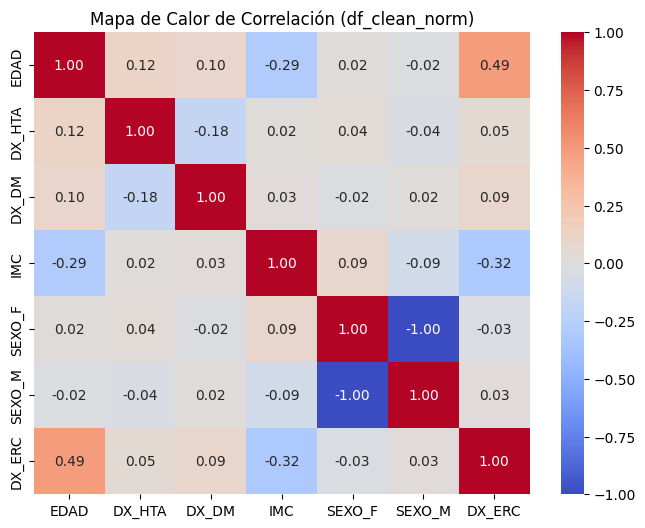

In [11]:
# Seleccionar solo columnas numéricas de df_clean_norm
# df_clean_norm ya contiene las columnas numéricas relevantes después de la limpieza y normalización
df_numeric_norm = df_clean_norm.select_dtypes(include=np.number)

plt.figure(figsize=(8, 6))
# Calcular la matriz de correlación
correlation_matrix = df_numeric_norm.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Mapa de Calor de Correlación (df_clean_norm)')
plt.show()


## PairPlots

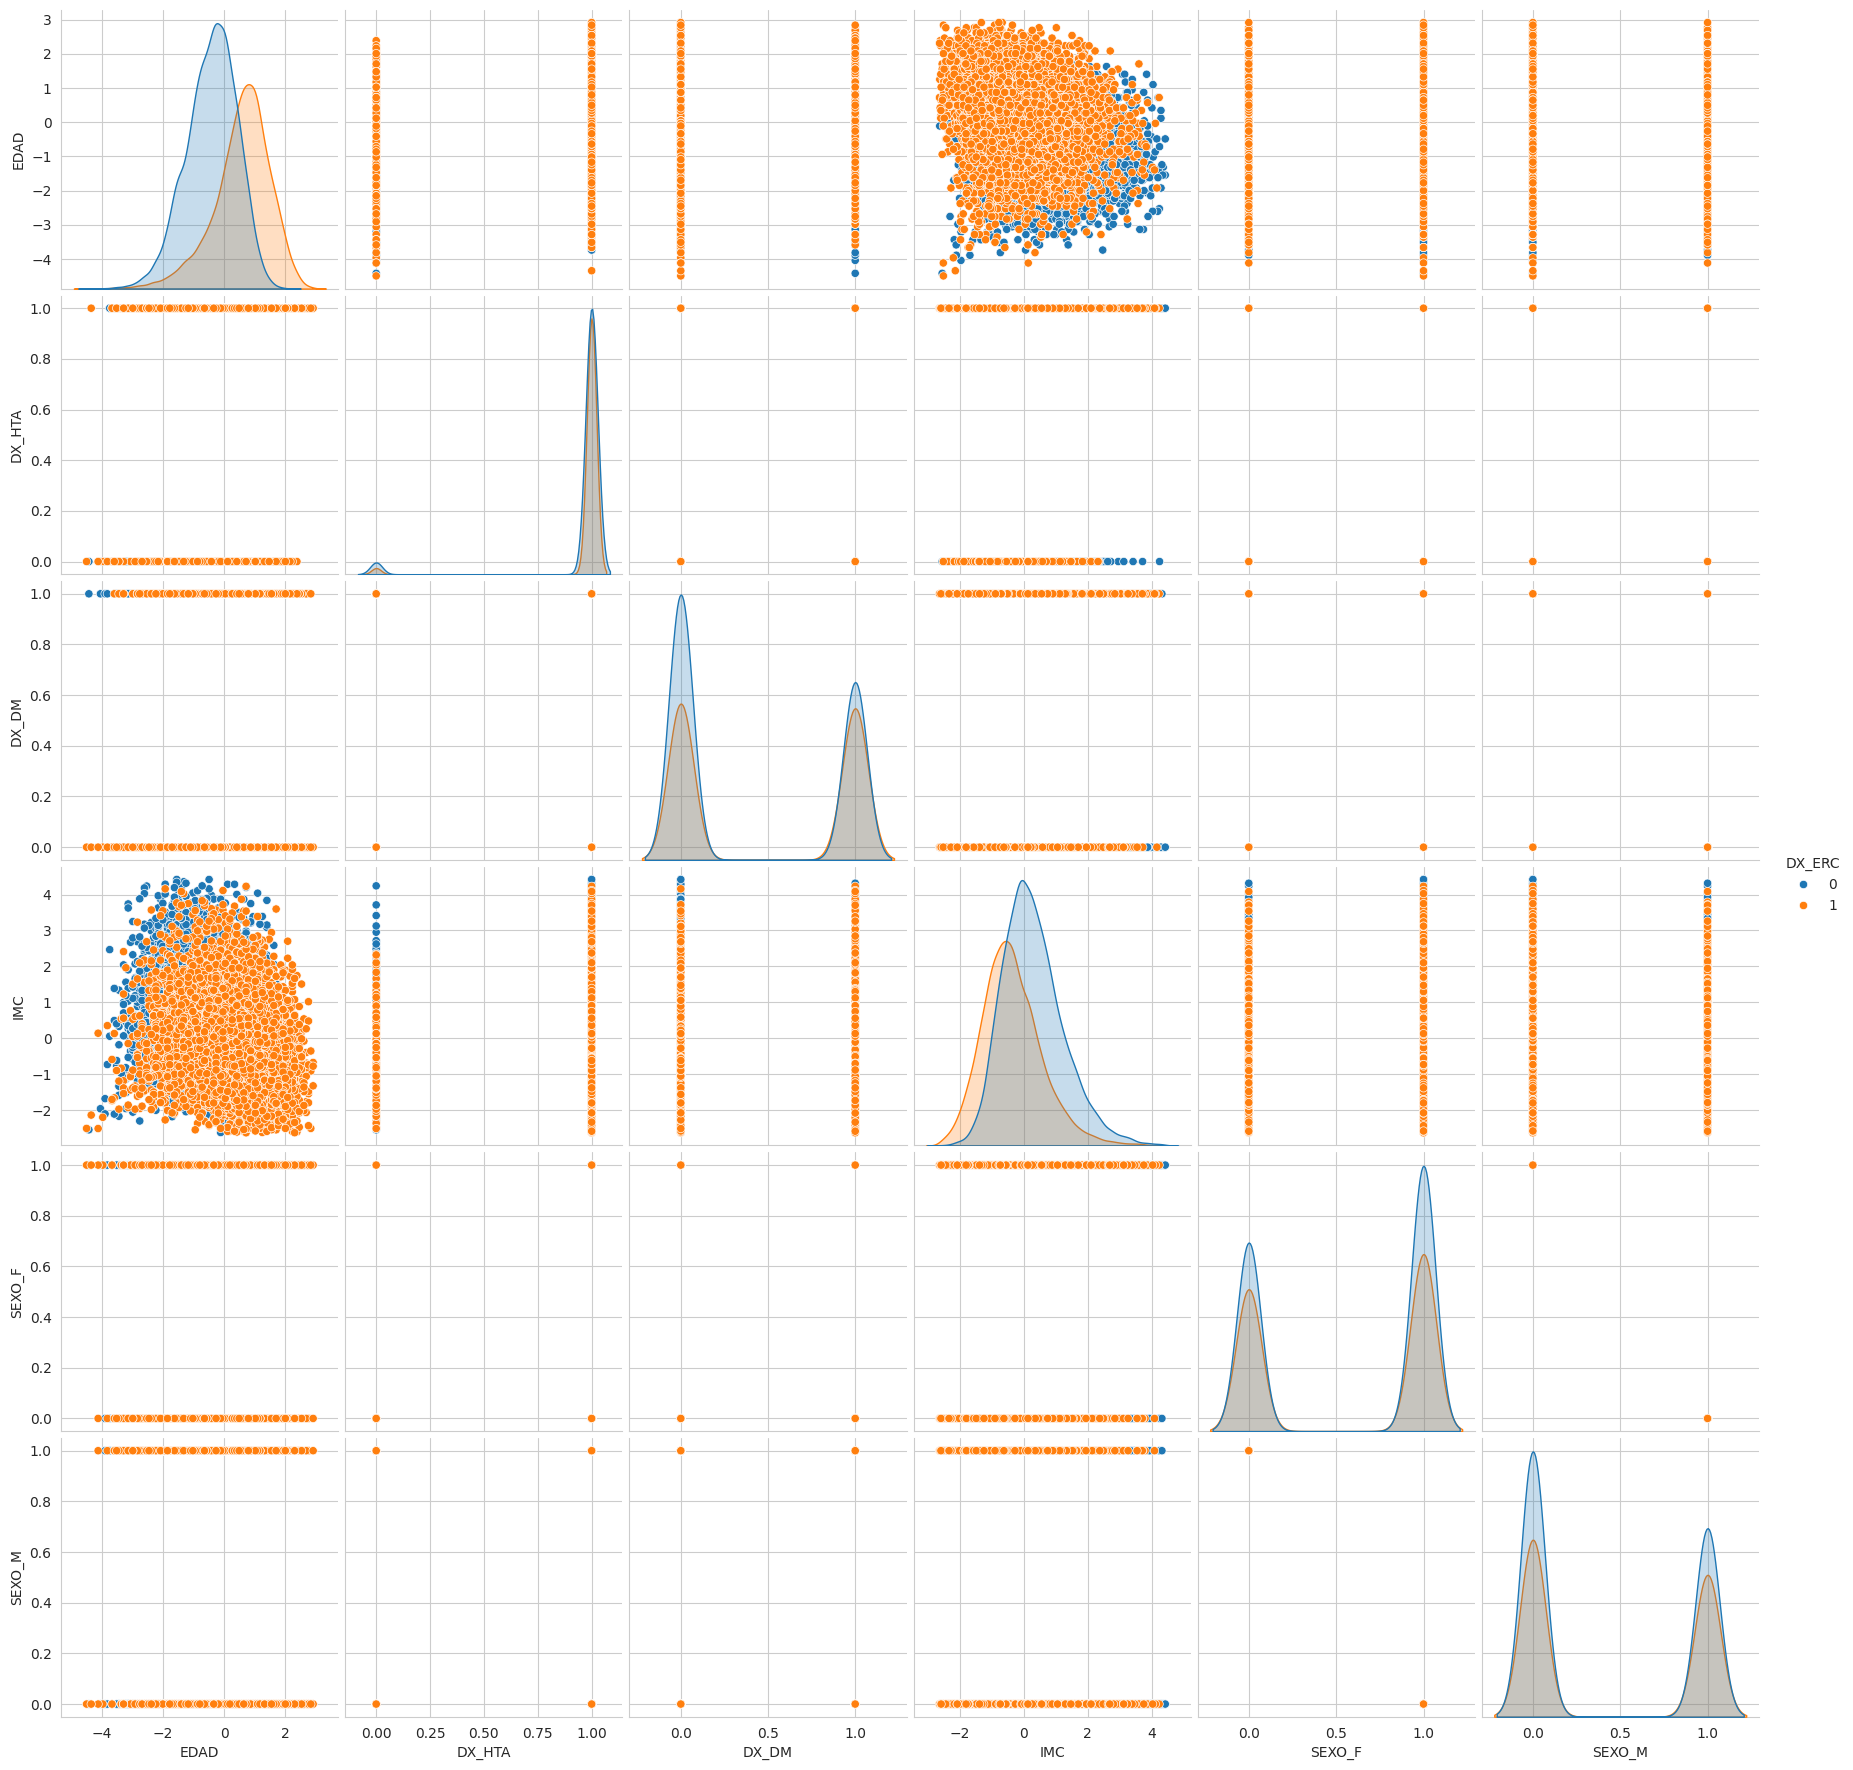

In [12]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df_clean_norm, hue="DX_ERC", height=3);
plt.show()

## Box Plots

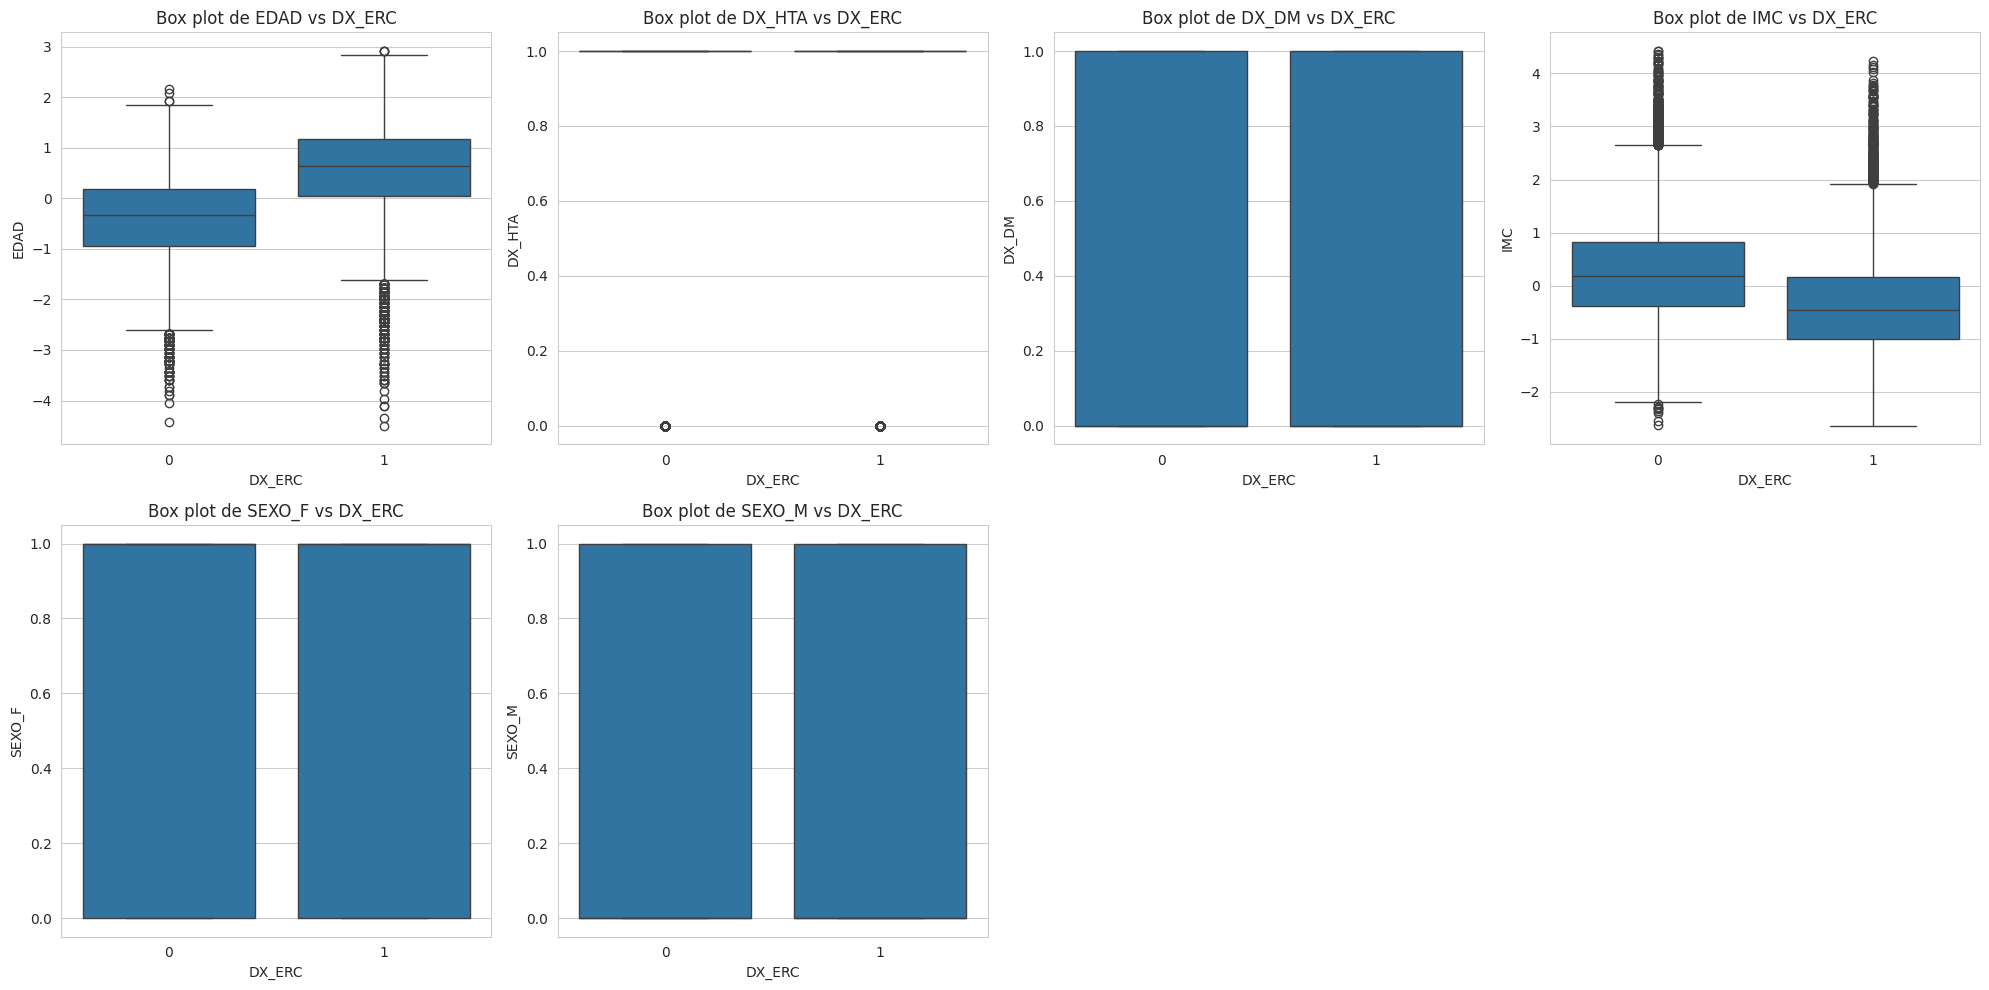

In [13]:
# Select only numerical columns from df_clean_norm for box plots, excluding 'DX_ERC'
df_numeric_norm_for_box = df_clean_norm.select_dtypes(include=np.number).drop(columns=['DX_ERC'])

# Determine the number of columns for the grid
n_cols_box = 4 # Let's use 4 columns per row for better visualization
n_rows_box = (len(df_numeric_norm_for_box.columns) + n_cols_box - 1) // n_cols_box

# Create the subplots grid
fig_box, axes_box = plt.subplots(n_rows_box, n_cols_box, figsize=(n_cols_box * 5, n_rows_box * 5))
axes_box = axes_box.flatten() # Flatten the 2D array of axes for easier iteration

# Generate box plots for each numerical column against 'DX_ERC'
for i, column in enumerate(df_numeric_norm_for_box.columns):
    sns.boxplot(data=df_clean_norm, x='DX_ERC', y=column, ax=axes_box[i])
    axes_box[i].set_title(f'Box plot de {column} vs DX_ERC')
    axes_box[i].set_xlabel('DX_ERC')
    axes_box[i].set_ylabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes_box)):
    fig_box.delaxes(axes_box[j])

plt.tight_layout()
plt.show()

## Violin Plots

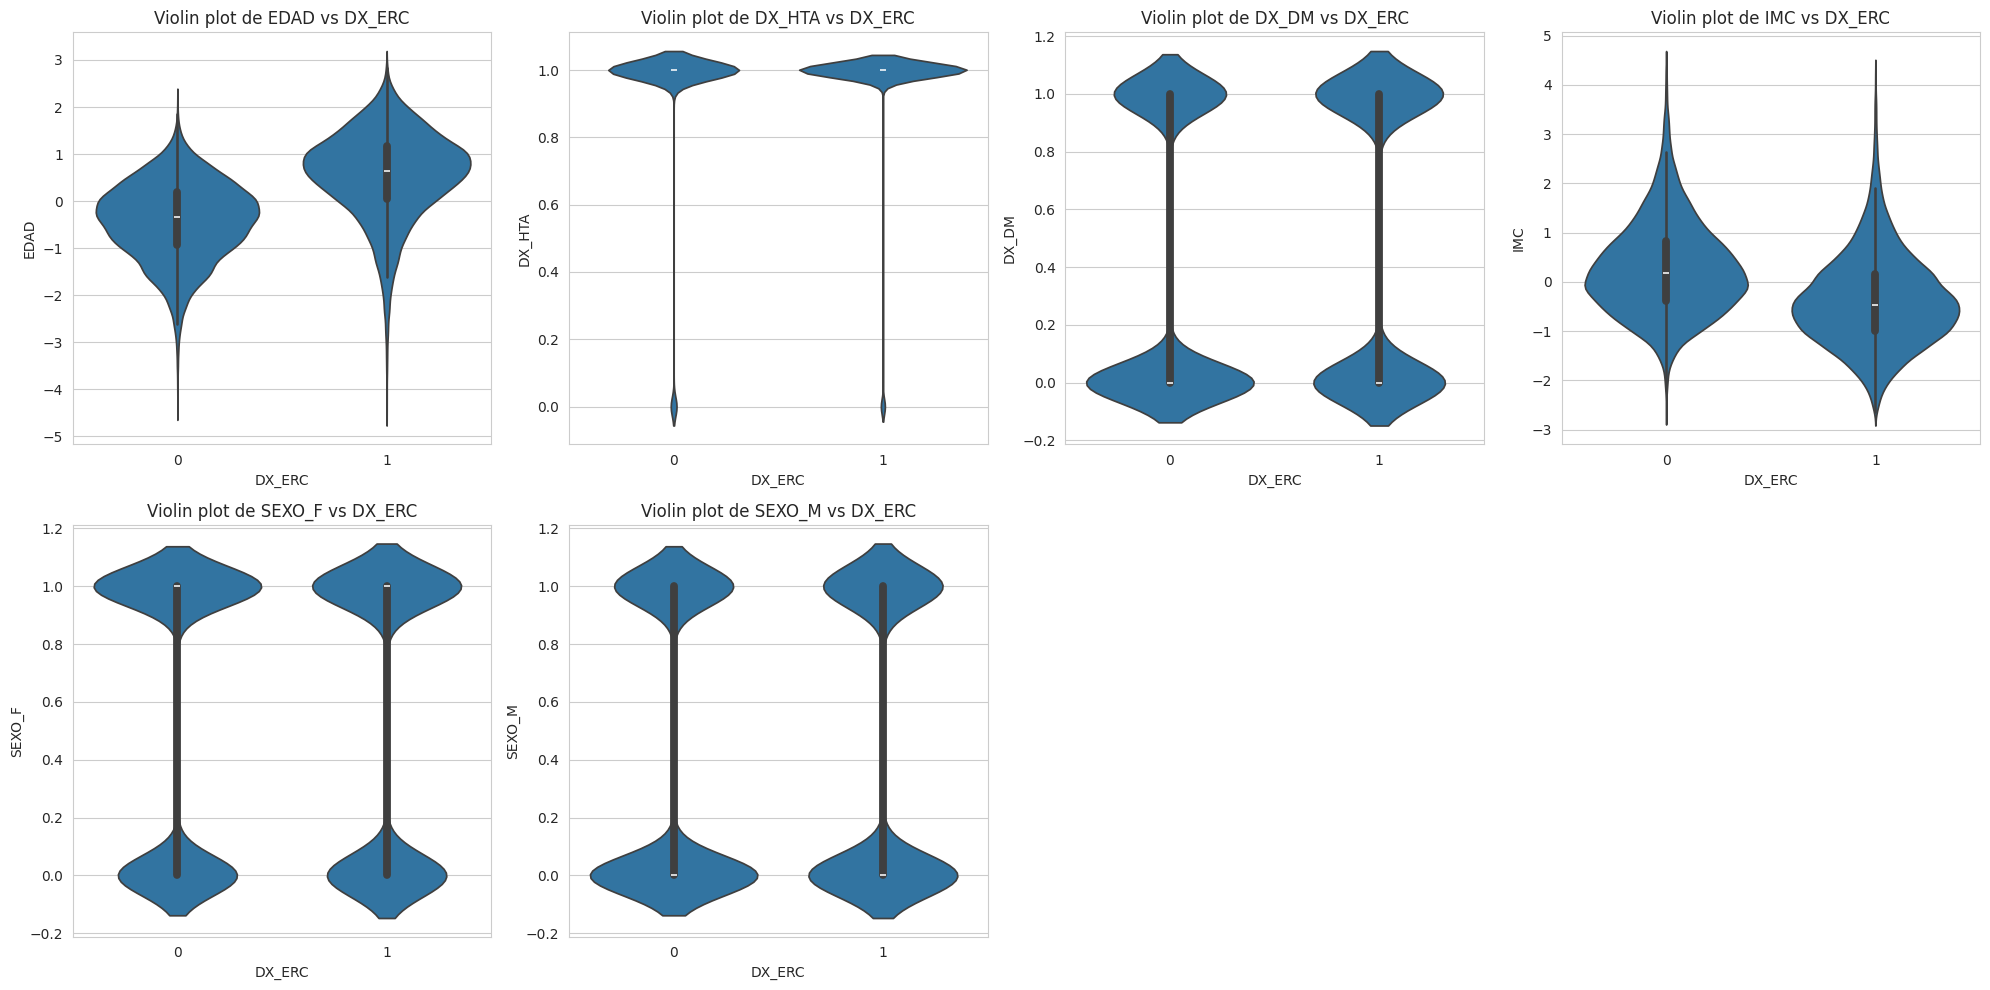

In [14]:
# Select only numerical columns from df_clean_norm for violin plots, excluding 'DX_ERC'
df_numeric_norm_for_violin = df_clean_norm.select_dtypes(include=np.number).drop(columns=['DX_ERC'])

# Determine the number of columns for the grid
n_cols_violin = 4 # Let's use 4 columns per row for better visualization
n_rows_violin = (len(df_numeric_norm_for_violin.columns) + n_cols_violin - 1) // n_cols_violin

# Create the subplots grid
fig_violin, axes_violin = plt.subplots(n_rows_violin, n_cols_violin, figsize=(n_cols_violin * 5, n_rows_violin * 5))
axes_violin = axes_violin.flatten() # Flatten the 2D array of axes for easier iteration

# Generate violin plots for each numerical column against 'DX_ERC'
for i, column in enumerate(df_numeric_norm_for_violin.columns):
    sns.violinplot(data=df_clean_norm, x='DX_ERC', y=column, ax=axes_violin[i])
    axes_violin[i].set_title(f'Violin plot de {column} vs DX_ERC')
    axes_violin[i].set_xlabel('DX_ERC')
    axes_violin[i].set_ylabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes_violin)):
    fig_violin.delaxes(axes_violin[j])

plt.tight_layout()
plt.show()

## Distribucion de Probabilidad

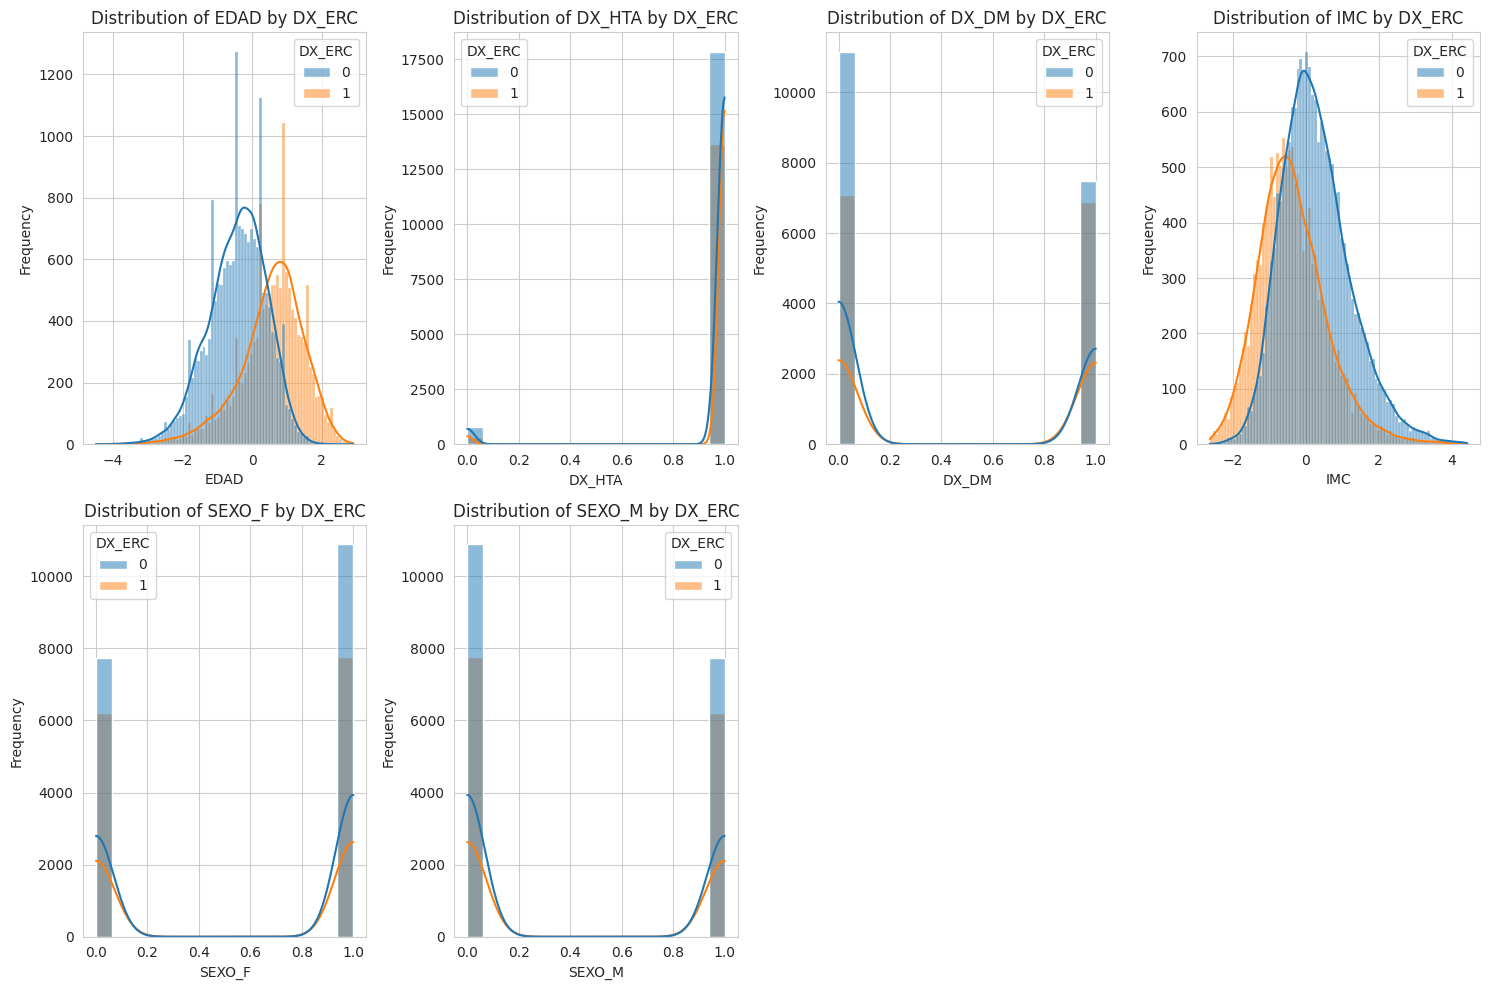

In [15]:
# Select only numerical columns, excluding the target variable 'DX_ERC' and 'MUERTO'
df_numeric = df_clean_norm.select_dtypes(include=np.number).drop(columns=['DX_ERC'])

# Determine the number of rows for the grid
n_cols = 4
n_rows = (len(df_numeric.columns) + n_cols - 1) // n_cols

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Generate histograms for each numerical feature, separated by 'DX_ERC'
for i, column in enumerate(df_numeric.columns):
    sns.histplot(data=df_clean_norm, x=column, hue='DX_ERC', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by DX_ERC')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Scatterplot

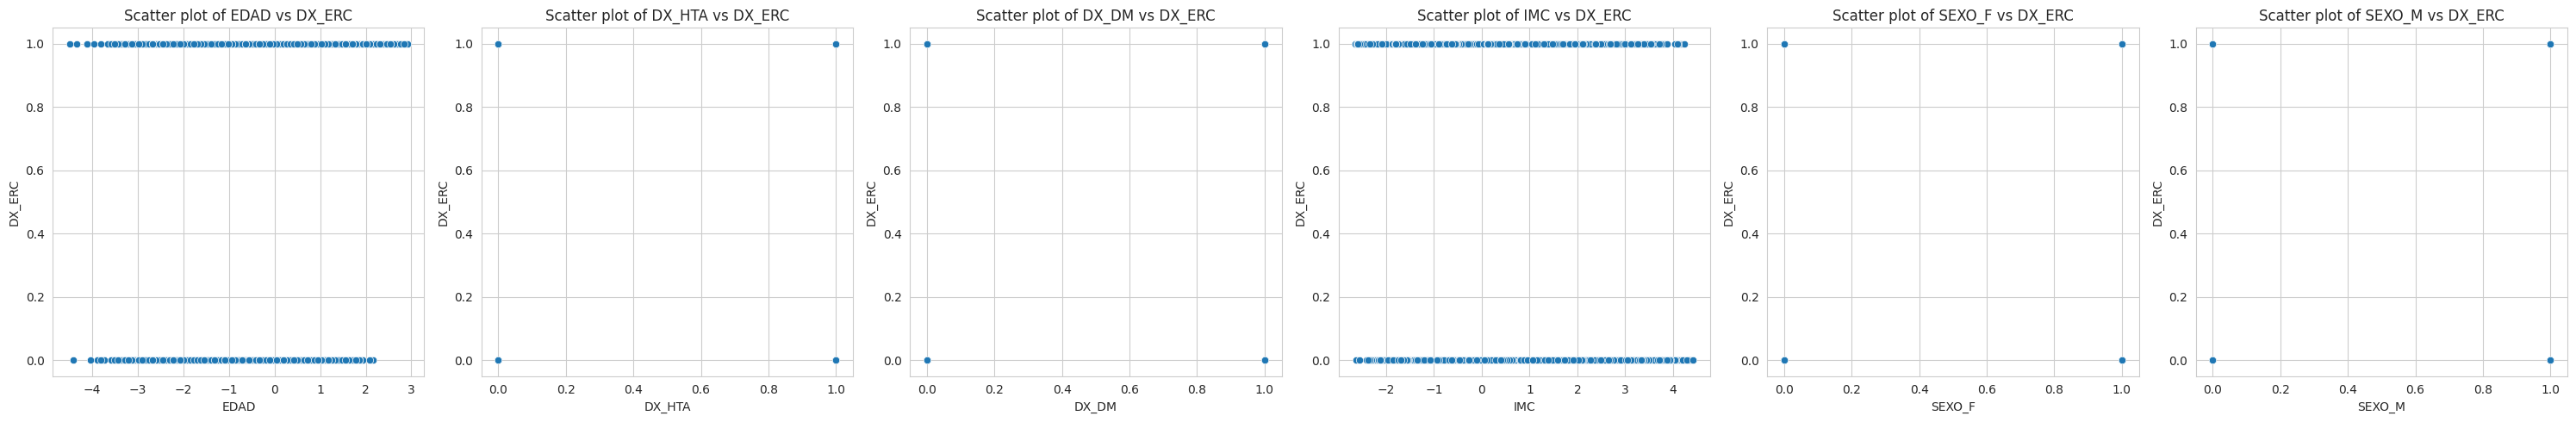

In [16]:
# Select only numerical columns for scatter plots, excluding 'DX_ERC' as it will be on the y-axis
df_numeric = df_clean_norm.select_dtypes(include=np.number).drop(columns=['DX_ERC'])

# Determine the number of columns for the grid (one row)
n_cols = len(df_numeric.columns)
n_rows = 1

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, 5)) # Adjust figsize for a single row
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Generate scatter plots for each numerical column against 'DX_ERC'
for i, column in enumerate(df_numeric.columns):
    sns.scatterplot(data=df_clean_norm, x=column, y='DX_ERC', ax=axes[i])
    axes[i].set_title(f'Scatter plot of {column} vs DX_ERC')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('DX_ERC')

plt.tight_layout()
plt.show()

## APLICACIÓN MODELOS APRENDIZAJE AUTOMATICO

## 0. Partición de datos
aplicable a todos los modelos de aprendizaje supervisado

In [17]:
from sklearn.model_selection import train_test_split

# Separar características (X) y la variable objetivo (y)
X = df_clean_norm.drop('DX_ERC', axis=1)
y = df_clean_norm['DX_ERC']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar las formas de los conjuntos resultantes
print(f'Forma de X_train: {X_train.shape}')
print(f'Forma de X_test: {X_test.shape}')
print(f'Forma de y_train: {y_train.shape}')
print(f'Forma de y_test: {y_test.shape}')

Forma de X_train: (26064, 6)
Forma de X_test: (6516, 6)
Forma de y_train: (26064,)
Forma de y_test: (6516,)


In [18]:
print('--- Información de X_train ---')
X_train.info()
print('\n--- Información de X_test ---')
X_test.info()
print('\n--- Información de y_train ---')
y_train.info()
print('\n--- Información de y_test ---')
y_test.info()

--- Información de X_train ---
<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 29160 to 4862
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EDAD    26064 non-null  float64
 1   DX_HTA  26064 non-null  int64  
 2   DX_DM   26064 non-null  int64  
 3   IMC     26064 non-null  float64
 4   SEXO_F  26064 non-null  int64  
 5   SEXO_M  26064 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.4 MB

--- Información de X_test ---
<class 'pandas.core.frame.DataFrame'>
Index: 6516 entries, 30145 to 16518
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EDAD    6516 non-null   float64
 1   DX_HTA  6516 non-null   int64  
 2   DX_DM   6516 non-null   int64  
 3   IMC     6516 non-null   float64
 4   SEXO_F  6516 non-null   int64  
 5   SEXO_M  6516 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 356.3 KB

--- Información de y_train ---


In [19]:
import pandas as pd

summary_data = {
    'Partición': [],
    'Forma': [],
    'Columnas/Clases': [],
    'Tipos de Datos (X)': [],
    'Distribución de Clases (y)': []
}

# Summarize X_train
summary_data['Partición'].append('X_train')
summary_data['Forma'].append(X_train.shape)
summary_data['Columnas/Clases'].append(list(X_train.columns))
summary_data['Tipos de Datos (X)'].append(X_train.dtypes.to_dict())
summary_data['Distribución de Clases (y)'].append('N/A')

# Summarize X_test
summary_data['Partición'].append('X_test')
summary_data['Forma'].append(X_test.shape)
summary_data['Columnas/Clases'].append(list(X_test.columns))
summary_data['Tipos de Datos (X)'].append(X_test.dtypes.to_dict())
summary_data['Distribución de Clases (y)'].append('N/A')

# Summarize y_train
summary_data['Partición'].append('y_train')
summary_data['Forma'].append(y_train.shape)
summary_data['Columnas/Clases'].append('DX_ERC')
summary_data['Tipos de Datos (X)'].append('N/A')
summary_data['Distribución de Clases (y)'].append(y_train.value_counts().to_dict())

# Summarize y_test
summary_data['Partición'].append('y_test')
summary_data['Forma'].append(y_test.shape)
summary_data['Columnas/Clases'].append('DX_ERC')
summary_data['Tipos de Datos (X)'].append('N/A')
summary_data['Distribución de Clases (y)'].append(y_test.value_counts().to_dict())

summary_df = pd.DataFrame(summary_data)
display(summary_df)


,Partición,Forma,Columnas/Clases,Tipos de Datos (X),Distribución de Clases (y)
0,X_train,"(26064, 6)","[EDAD, DX_HTA, DX_DM, IMC, SEXO_F, SEXO_M]","{'EDAD': float64, 'DX_HTA': int64, 'DX_DM': in...",N/A
1,X_test,"(6516, 6)","[EDAD, DX_HTA, DX_DM, IMC, SEXO_F, SEXO_M]","{'EDAD': float64, 'DX_HTA': int64, 'DX_DM': in...",N/A
2,y_train,"(26064,)",DX_ERC,N/A,"{0: 14889, 1: 11175}"
3,y_test,"(6516,)",DX_ERC,N/A,"{0: 3722, 1: 2794}"


## Modelo 1. Regresión Logística


Accuracy (Logistic Regression): 0.7680

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3722
           1       0.74      0.70      0.72      2794

    accuracy                           0.77      6516
   macro avg       0.76      0.76      0.76      6516
weighted avg       0.77      0.77      0.77      6516


Confusion Matrix (Logistic Regression):

[[3050  672]
 [ 840 1954]]
AUC (Logistic Regression): 0.8254


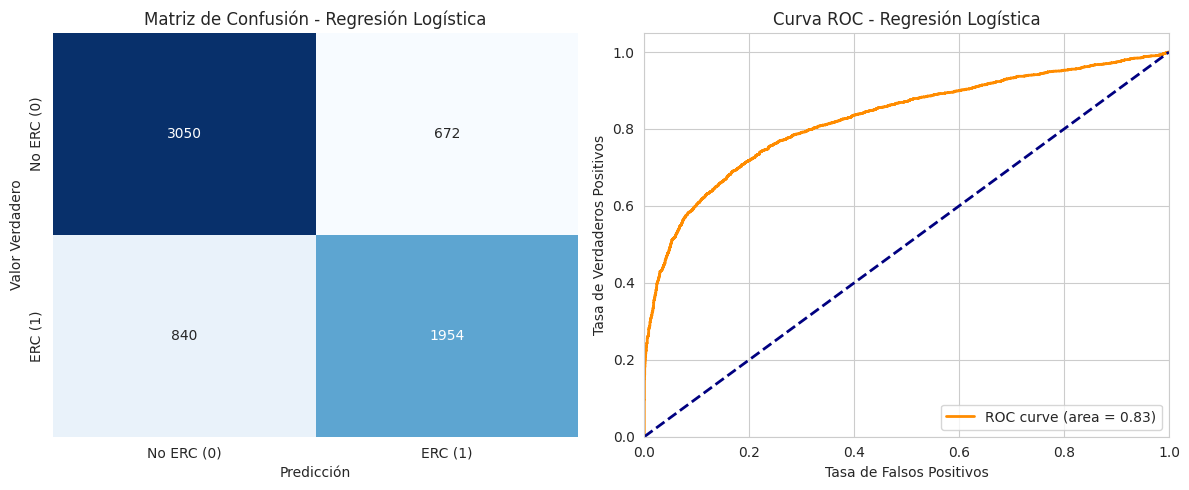


Logistic Regression model trained and evaluated. Results stored.


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = log_reg_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate ROC curve and AUC
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

print(f"Accuracy (Logistic Regression): {accuracy_lr:.4f}")
print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix (Logistic Regression):\n")
print(conf_matrix_lr)
print(f"AUC (Logistic Regression): {auc_lr:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No ERC (0)', 'ERC (1)'], yticklabels=['No ERC (0)', 'ERC (1)'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Store results for future comparison
results = {}
results['Logistic Regression'] = {
    'accuracy': accuracy_lr,
    'classification_report': report_lr,
    'confusion_matrix': conf_matrix_lr.tolist(),
    'auc': auc_lr
}

print("\nLogistic Regression model trained and evaluated. Results stored.")


## Modelo 2. Random Forest

--- Random Forest ---
Accuracy: 0.7122

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3722
           1       0.67      0.64      0.66      2794

    accuracy                           0.71      6516
   macro avg       0.71      0.70      0.70      6516
weighted avg       0.71      0.71      0.71      6516


Confusion Matrix:
[[2842  880]
 [ 995 1799]]
AUC (Random Forest): 0.7787


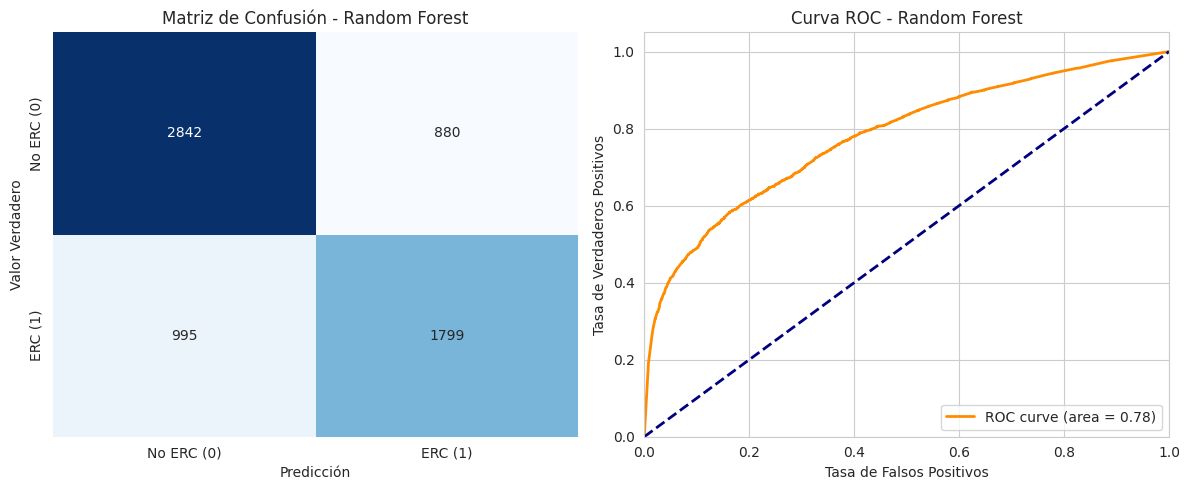


Random Forest model trained and evaluated. Results stored.


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate ROC curve and AUC
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

print("--- Random Forest ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print(f"AUC (Random Forest): {auc_rf:.4f}")

# Plot the confusion matrix and ROC curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No ERC (0)', 'ERC (1)'], yticklabels=['No ERC (0)', 'ERC (1)']) # Updated labels for clarity
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Almacenar los resultados para la comparación final
results['Random Forest'] = {
    'accuracy': accuracy_rf,
    'classification_report': report_rf,
    'confusion_matrix': conf_matrix_rf.tolist(),
    'auc': auc_rf
}

print("\nRandom Forest model trained and evaluated. Results stored.")


## Modelo 3. XGBoost

---XGBoost---
Accuracy:0.7712

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3722
           1       0.78      0.65      0.71      2794

    accuracy                           0.77      6516
   macro avg       0.77      0.76      0.76      6516
weighted avg       0.77      0.77      0.77      6516


Confusion Matrix:
[[3211  511]
 [ 980 1814]]
AUC (XGBoost): 0.8331


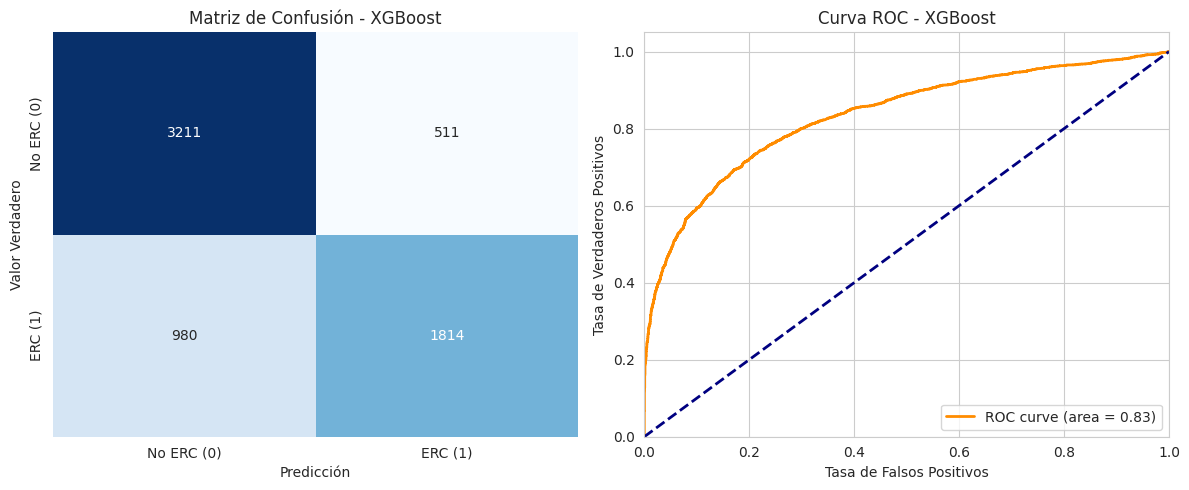


XGBoost model trained and evaluated. Results stored.


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate ROC curve and AUC
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

print("---XGBoost---")
print(f"Accuracy:{accuracy_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print(f"AUC (XGBoost): {auc_xgb:.4f}")

# Plot the confusion matrix and ROC curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No ERC (0)', 'ERC (1)'], yticklabels=['No ERC (0)', 'ERC (1)'])
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - XGBoost')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Store results for future comparison
results['XGBoost'] = {
    'accuracy': accuracy_xgb,
    'classification_report': report_xgb,
    'confusion_matrix': conf_matrix_xgb.tolist(),
    'auc': auc_xgb
}

print("\nXGBoost model trained and evaluated. Results stored.")


## Modelo 4. KERNEL SVM

--- Kernel SVM ---
Accuracy: 0.7756

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      3722
           1       0.80      0.63      0.71      2794

    accuracy                           0.78      6516
   macro avg       0.78      0.76      0.76      6516
weighted avg       0.78      0.78      0.77      6516


Confusion Matrix:
[[3286  436]
 [1026 1768]]
AUC (Kernel SVM): 0.8247


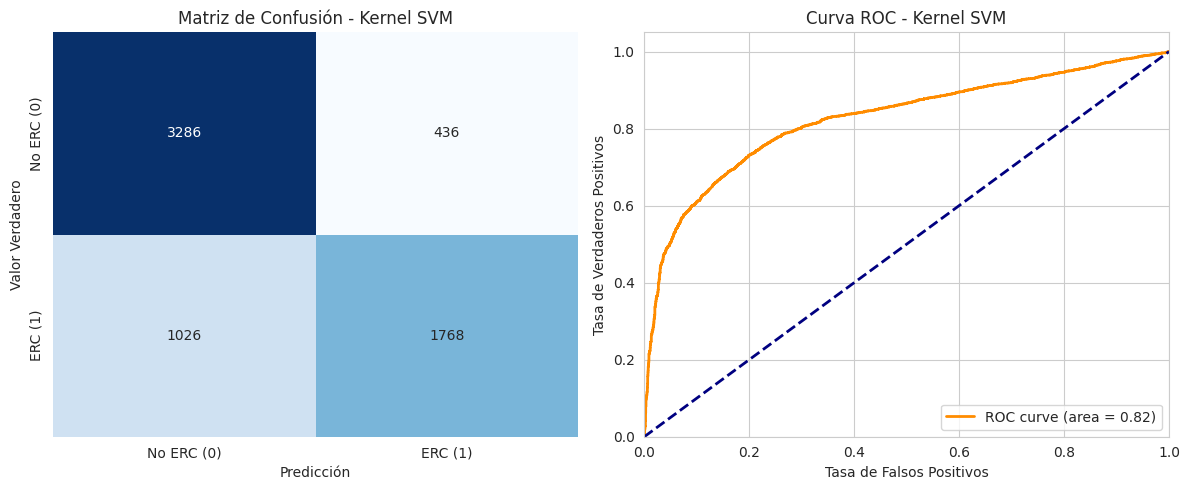


Kernel SVM model trained and evaluated. Results stored.


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inicializar el modelo SVC con kernel='rbf', random_state=42 y probability=True
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

# 2. Entrenar el modelo SVC utilizando los datos de entrenamiento
svm_model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# 4. Calcular la precisión (accuracy) del modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# 5. Generar un informe de clasificación y una matriz de confusión
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# 6. Calcular las probabilidades de predicción para la clase positiva
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# 7. Calcular la curva ROC y el Área bajo la curva (AUC)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)

# 8. Imprimir la precisión, el informe de clasificación, la matriz de confusión y el AUC
print("--- Kernel SVM ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print(f"AUC (Kernel SVM): {auc_svm:.4f}")

# 9. Crear una figura con dos subgráficas
plt.figure(figsize=(12, 5))

# 10. Visualizar la matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No ERC (0)', 'ERC (1)'], yticklabels=['No ERC (0)', 'ERC (1)'])
plt.title('Matriz de Confusión - Kernel SVM')
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')

# 11. Graficar la curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Kernel SVM')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 12. Almacenar los resultados en el diccionario 'results'
results['Kernel SVM'] = {
    'accuracy': accuracy_svm,
    'classification_report': report_svm,
    'confusion_matrix': conf_matrix_svm.tolist(),
    'auc': auc_svm
}

print("\nKernel SVM model trained and evaluated. Results stored.")

## Comparar Rendimiento de Modelos



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list to store comparison data
comparison_data = []

# Iterate through the results dictionary to extract relevant metrics
for model_name, metrics in results.items():
    accuracy = metrics['accuracy']
    auc_score = metrics.get('auc', 'N/A') # Get AUC, default to 'N/A' if not present

    # Extract precision, recall, f1-score for each class
    # Safely get class 0 and class 1 metrics, handling cases where they might be missing or not directly accessible
    class_0_metrics = metrics['classification_report'].get('0', {'precision': 0, 'recall': 0, 'f1-score': 0})
    class_1_metrics = metrics['classification_report'].get('1', {'precision': 0, 'recall': 0, 'f1-score': 0})

    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'AUC': auc_score,
        'Precision (Class 0)': class_0_metrics['precision'],
        'Recall (Class 0)': class_0_metrics['recall'],
        'F1-Score (Class 0)': class_0_metrics['f1-score'],
        'Precision (Class 1)': class_1_metrics['precision'],
        'Recall (Class 1)': class_1_metrics['recall'],
        'F1-Score (Class 1)': class_1_metrics['f1-score'],
    })

# Create a DataFrame from the comparison data
comparison_df = pd.DataFrame(comparison_data)

print("Comparison of Model Performance:")
display(comparison_df.set_index('Model'))



Comparison of Model Performance:


,Accuracy,AUC,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
Model,,,,,,,,
Logistic Regression,0.77,0.83,0.78,0.82,0.80,0.74,0.70,0.72
Random Forest,0.71,0.78,0.74,0.76,0.75,0.67,0.64,0.66
XGBoost,0.77,0.83,0.77,0.86,0.81,0.78,0.65,0.71
Kernel SVM,0.78,0.82,0.76,0.88,0.82,0.80,0.63,0.71


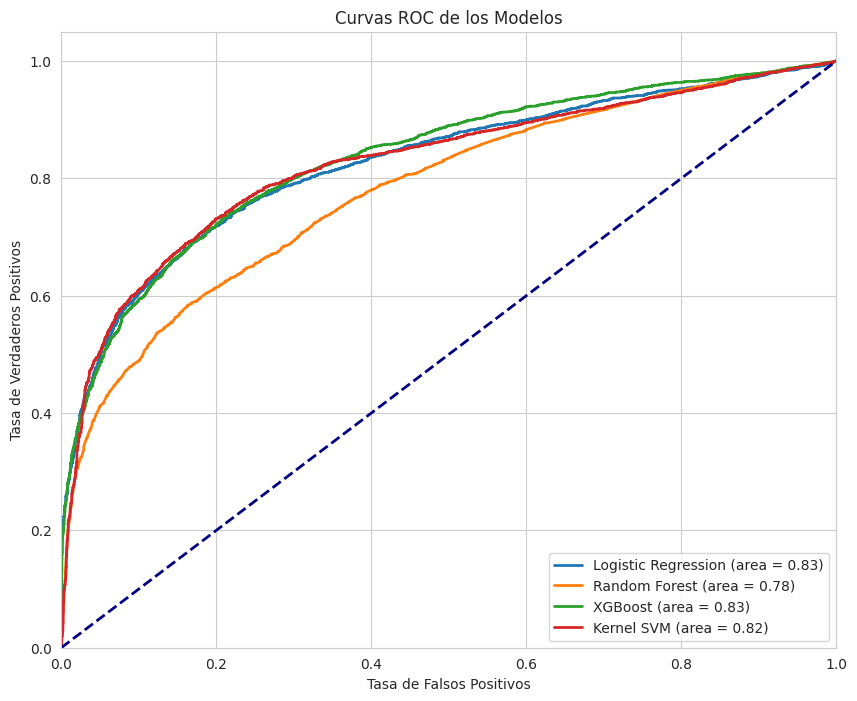

In [25]:
# Plot all ROC curves together for final comparison
plt.figure(figsize=(10, 8)) # Adjusted figure size for better visibility

# Plot Logistic Regression ROC curve
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (area = {results["Logistic Regression"]["auc"]:.2f})')

# Plot Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (area = {results["Random Forest"]["auc"]:.2f})')

# Plot XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (area = {results["XGBoost"]["auc"]:.2f})')

# Plot Kernel SVM ROC curve
plt.plot(fpr_svm, tpr_svm, lw=2, label=f'Kernel SVM (area = {results["Kernel SVM"]["auc"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC de los Modelos')
plt.legend(loc='lower right')
plt.show()

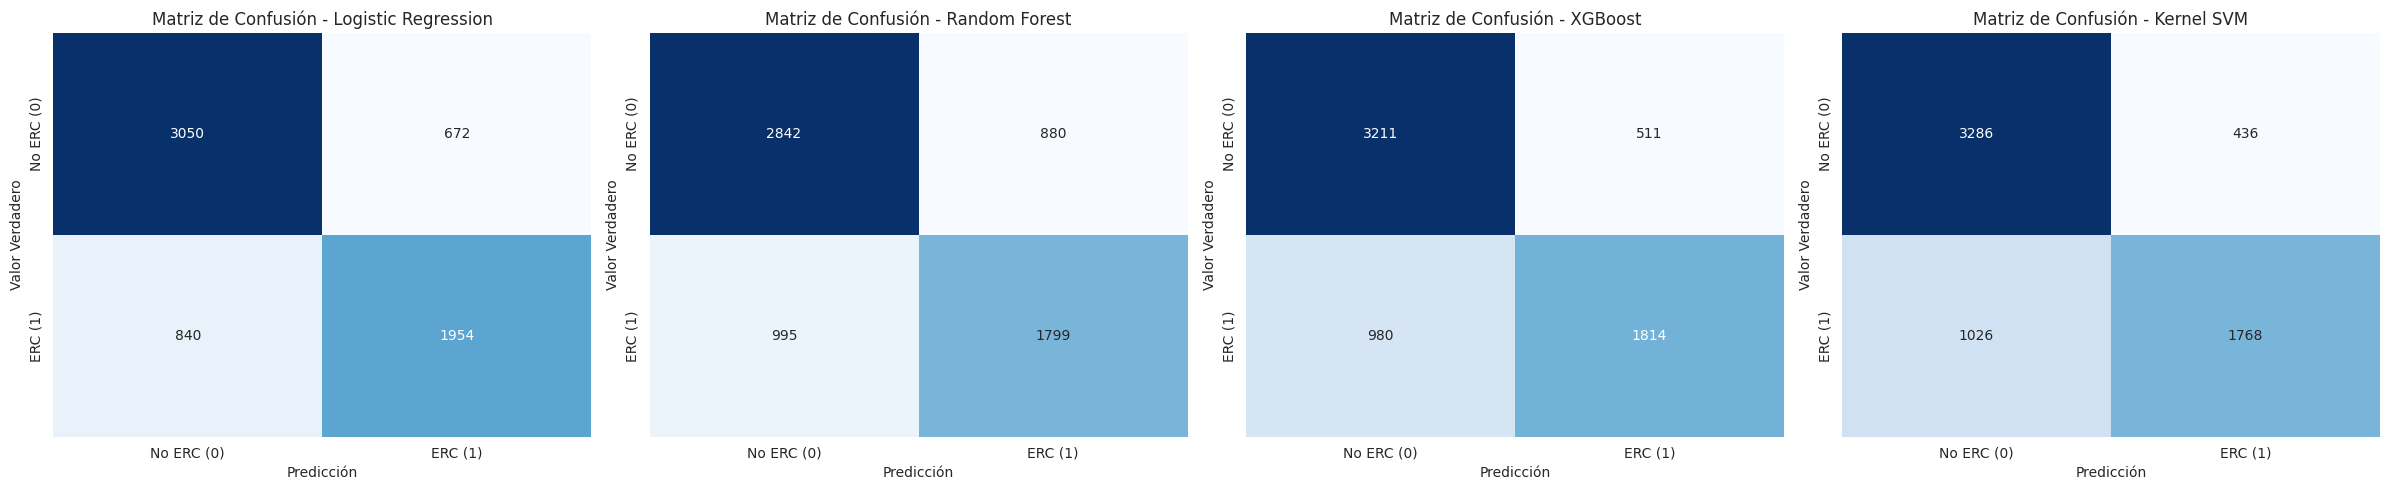

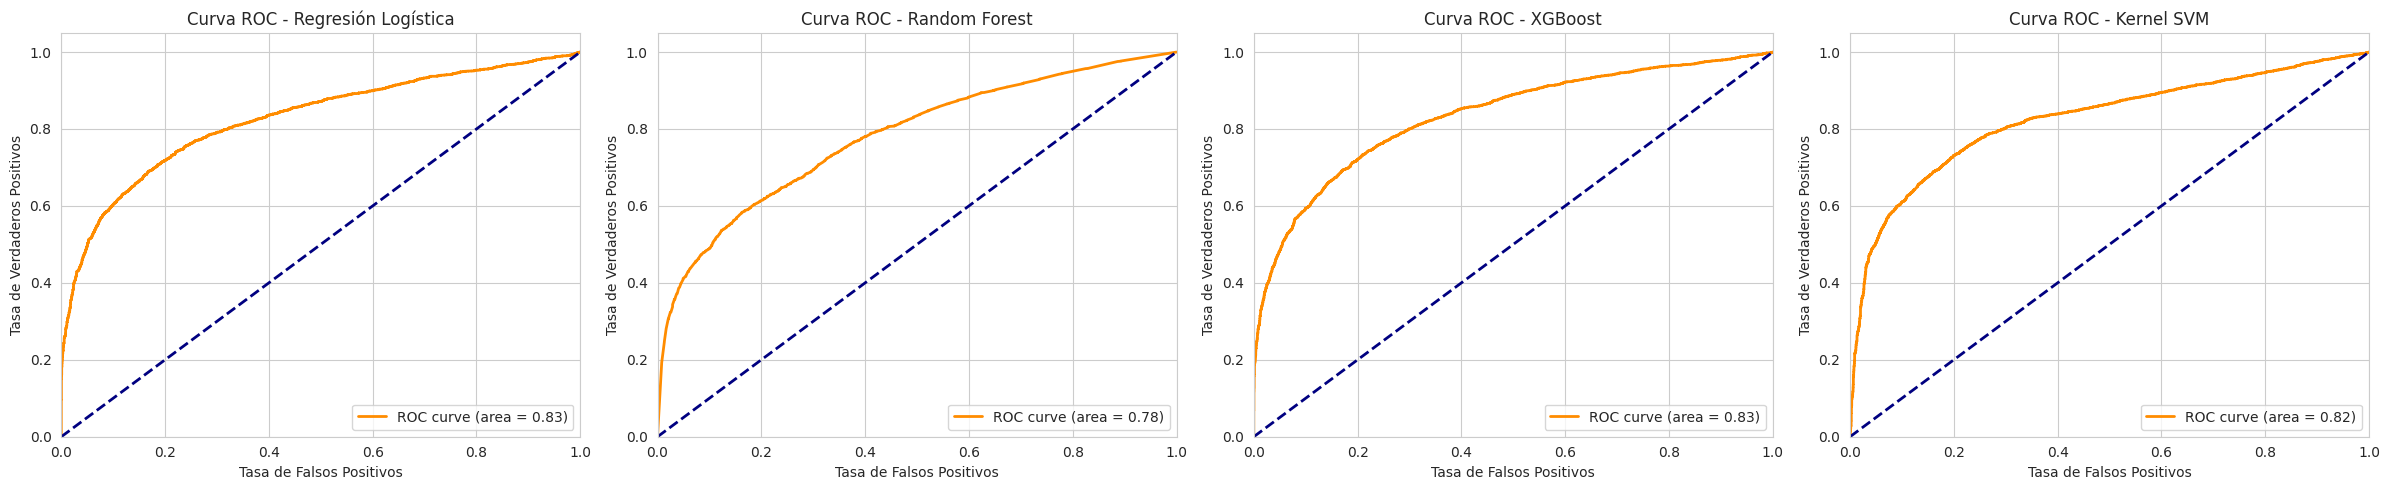

In [26]:
## TODAS LA MATRICES DE CONFUSION Y CURVAS ROC

import matplotlib.pyplot as plt
import seaborn as sns

# Cuadrícula para las Matrices de Confusión
fig_conf, axes_conf = plt.subplots(1, 4, figsize=(24, 5)) # Adjusted to 1 row, 4 columns
axes_conf = axes_conf.flatten()

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Kernel SVM']
conf_matrices = [results[name]['confusion_matrix'] for name in model_names]

for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No ERC (0)', 'ERC (1)'], yticklabels=['No ERC (0)', 'ERC (1)'], ax=axes_conf[i])
    axes_conf[i].set_title(f'Matriz de Confusión - {model_names[i]}')
    axes_conf[i].set_xlabel('Predicción')
    axes_conf[i].set_ylabel('Valor Verdadero')

plt.tight_layout()
plt.show()

# Cuadrícula para las Curvas ROC
fig_roc, axes_roc = plt.subplots(1, 4, figsize=(24, 5)) # Adjusted to 1 row, 4 columns
axes_roc = axes_roc.flatten()

# Graficar Curvas ROC individuales
# Logistic Regression
axes_roc[0].plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {results["Logistic Regression"]["auc"]:.2f})')
axes_roc[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes_roc[0].set_xlim([0.0, 1.0])
axes_roc[0].set_ylim([0.0, 1.05])
axes_roc[0].set_xlabel('Tasa de Falsos Positivos')
axes_roc[0].set_ylabel('Tasa de Verdaderos Positivos')
axes_roc[0].set_title('Curva ROC - Regresión Logística')
axes_roc[0].legend(loc='lower right')

# Random Forest
axes_roc[1].plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {results["Random Forest"]["auc"]:.2f})')
axes_roc[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes_roc[1].set_xlim([0.0, 1.0])
axes_roc[1].set_ylim([0.0, 1.05])
axes_roc[1].set_xlabel('Tasa de Falsos Positivos')
axes_roc[1].set_ylabel('Tasa de Verdaderos Positivos')
axes_roc[1].set_title('Curva ROC - Random Forest')
axes_roc[1].legend(loc='lower right')

# XGBoost
axes_roc[2].plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {results["XGBoost"]["auc"]:.2f})')
axes_roc[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes_roc[2].set_xlim([0.0, 1.0])
axes_roc[2].set_ylim([0.0, 1.05])
axes_roc[2].set_xlabel('Tasa de Falsos Positivos')
axes_roc[2].set_ylabel('Tasa de Verdaderos Positivos')
axes_roc[2].set_title('Curva ROC - XGBoost')
axes_roc[2].legend(loc='lower right')

# Kernel SVM
axes_roc[3].plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {results["Kernel SVM"]["auc"]:.2f})')
axes_roc[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes_roc[3].set_xlim([0.0, 1.0])
axes_roc[3].set_ylim([0.0, 1.05])
axes_roc[3].set_xlabel('Tasa de Falsos Positivos')
axes_roc[3].set_ylabel('Tasa de Verdaderos Positivos')
axes_roc[3].set_title('Curva ROC - Kernel SVM')
axes_roc[3].legend(loc='lower right')

plt.tight_layout()
plt.show()

## Análisis integral de modelos


Accuracy (Precisión General):
Kernel SVM tiene la Accuracy más alta con 0.7756. (77.56% de predicciones correctas).
XGBoost le sigue de cerca con 0.7712.
Regresión Logística también muestra un buen rendimiento con 0.7680.
Random Forest es significativamente más bajo con 0.7122.

AUC (Área bajo la Curva ROC):
Esta métrica es crucial para evaluar la capacidad de un modelo para distinguir entre clases, especialmente en problemas con clases desbalanceadas.

XGBoost obtiene el AUC más alto con 0.8331, lo que indica una excelente capacidad de discriminación.
Regresión Logística sigue con 0.8254.
Kernel SVM está muy cerca con 0.8247.
Random Forest nuevamente es el más bajo con 0.7787.

Precisión (Clase 1 - ERC):
Indica cuántas de las predicciones positivas (ERC) fueron realmente correctas.

Kernel SVM tiene la Precisión más alta con 0.8022. Esto significa que cuando predice ERC, es correcto el 80.22% de las veces.
XGBoost le sigue con 0.7802.

Recall (Clase 1 - ERC):
Indica la capacidad del modelo para encontrar todas las muestras positivas reales (ERC).

Regresión Logística tiene el Recall más alto con 0.6994. Esto es importante para no perder casos reales de ERC.
XGBoost y Kernel SVM son ligeramente más bajos con 0.6492 y 0.6328 respectivamente.

F1-Score (Clase 1 - ERC):
Es un promedio ponderado de la Precisión y el Recall, útil para buscar un equilibrio.

Regresión Logística tiene el F1-Score más alto con 0.7210.
XGBoost y Kernel SVM son muy similares, con 0.7087 y 0.7075 respectivamente.

Conclusión:
Considerando un balance entre la precisión general (Accuracy), la capacidad de discriminación (AUC), y el rendimiento en la clase positiva (ERC) a través del F1-Score:

XGBoost y Regresión Logística muestran un rendimiento excepcional en AUC, lo que los hace muy buenos para distinguir entre pacientes con y sin ERC.

Kernel SVM y XGBoost presentan la Precisión más alta para la clase 1, lo cual es importante para que las predicciones de ERC sean fiables.
Regresión Logística logra el Recall y el F1-Score más altos para la clase 1, indicando una mejor identificación de los casos reales de ERC sin generar demasiados falsos positivos.

Si el objetivo principal es tener la mejor capacidad de discriminación y una alta fiabilidad en las predicciones positivas (bajos falsos positivos), el XGBoost es un candidato muy fuerte debido a su AUC superior y buena precisión. El Kernel SVM también es muy competitivo, especialmente en precisión.

Sin embargo, si se busca identificar la mayor cantidad posible de casos reales de ERC (alto recall), incluso si eso implica algunos falsos positivos más, la Regresión Logística tiene una ligera ventaja en Recall y F1-Score.

Considerando el balance general y la robustez, el modelo que parece más prometedor es el XGBoost. Ofrece el mejor AUC y una excelente precisión para la clase 1, lo que sugiere que es muy bueno para clasificar correctamente y tiene un buen equilibrio entre los diferentes tipos de errores. El Kernel SVM es una alternativa muy cercana en rendimiento general y también merece una consideración importante.

Por lo tanto, la elección final entre XGBoost y Kernel SVM podría depender de requisitos específicos de negocio o de la tolerabilidad a falsos positivos/negativos. Pero basándonos estrictamente en estas métricas, XGBoost se posiciona como el mejor modelo en este análisis.

## Software Simulador - ERC

In [27]:
!pip install gradio

In [28]:
import gradio as gr
import pandas as pd
import numpy as np

# Ensure scaler and svm_model are accessible (they are in the current kernel state)
# Ensure X_train is accessible for column order

def predict_erc(edad, dx_hta, dx_dm, imc, sexo_f, sexo_m):
    # 1. Create a DataFrame from the inputs, ensuring column order matches X_train
    input_data = pd.DataFrame([[edad, dx_hta, dx_dm, imc, sexo_f, sexo_m]],
                              columns=X_train.columns)

    # 2. Apply preprocessing: Scaling 'EDAD' and 'IMC' using the fitted scaler
    # We need to make sure to only scale the columns that were originally scaled
    # Create a copy to avoid SettingWithCopyWarning
    processed_input_data = input_data.copy()
    processed_input_data[['EDAD', 'IMC']] = scaler.transform(processed_input_data[['EDAD', 'IMC']])

    # 3. Make prediction using model.predict_proba()
    # The model predicts probabilities for both classes [prob_class_0, prob_class_1]
    prediction_proba = xgb_model.predict_proba(processed_input_data)

    # Probabilities for each class
    probability_no_erc = prediction_proba[0, 0] # Probability of DX_ERC being 0
    probability_erc = prediction_proba[0, 1]    # Probability of DX_ERC being 1

    # Determine the predicted class
    predicted_class = np.argmax(prediction_proba[0])

    # 4. Format the output
    if predicted_class == 1:
        result_message = "¡ALTA probabilidad de Enfermedad Renal Crónica (ERC)!"
    else:
        result_message = "Baja probabilidad de Enfermedad Renal Crónica (ERC)."

    prediction_text = (f"{result_message}\n\n"\
                       f"Probabilidad de No ERC (Clase 0): {probability_no_erc:.2%}\n"\
                       f"Probabilidad de ERC (Clase 1): {probability_erc:.2%}")

    return prediction_text

In [29]:
inputs = [
    gr.Slider(minimum=0, maximum=100, label='EDAD'),
    gr.Radio(choices=[0, 1], label='DX_HTA (0: No, 1: Sí)'),
    gr.Radio(choices=[0, 1], label='DX_DM (0: No, 1: Sí)'),
    gr.Slider(minimum=15, maximum=45, label='IMC'),
    gr.Radio(choices=[0, 1], label='SEXO_F (0: No, 1: Sí)'),
    gr.Radio(choices=[0, 1], label='SEXO_M (0: No, 1: Sí)')
]

outputs = gr.Textbox(label='Prediction Result', lines=10)

gr.Interface(fn=predict_erc, inputs=inputs, outputs=outputs,
             title='Predicción de Enfermedad Renal Crónica - ERC',
             description='Introduce los valores para predecir la probabilidad de ERC para pacientes con diagnóstico Hipertensión Arterial y/o Diabetes Mellitus.').launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8e182325081322a750.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## MUY IMPORTE:
Esta calculadora del riesgo de ERC ha sido entrenada con una base de datos de pacientes que cuentan con el diagnóstico de al menos una de las tres enfermedades analizadas, por tanto correr el modelo con datos de personas completamente sanas, puede arrojar resultados no confiables.